# Classification

Classification is a supervised machine learning technique used to categorize data into predefined groups or classes. Unlike regression (which predicts continuous values), classification predicts discrete outcomes such as yes/no, spam/ham, or disease/no disease. It works by learning patterns from labeled data and applying them to new, unseen data.

## Linear Models in Classification

Linear models assume a linear relationship between the input features and the output. In classification, these models try to separate classes using a straight line (in 2D), plane (in 3D), or hyperplane (in higher dimensions).

Examples of linear models in classification include:

1. Logistic Regression

2. Support Vector Machines (SVMs)

### Logistic Regression

Logistic Regression is a linear classification algorithm that predicts the probability of a data point belonging to a particular class. Instead of predicting values directly, it uses the logistic (sigmoid) function to map any real-valued number into a range between 0 and 1.

* If probability > 0.5 → classify as Class 1

* If probability ≤ 0.5 → classify as Class 0

It is widely used for binary classification problems such as spam detection, fraud detection, or medical diagnosis.

![Screenshot 2025-09-09 075934.png](<attachment:Screenshot 2025-09-09 075934.png>)
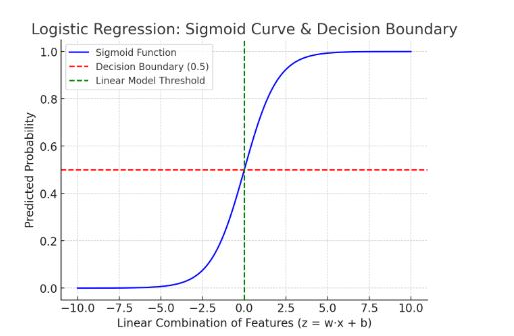

Here’s a diagram showing the sigmoid curve used in logistic regression. The red dashed line at 0.5 is the decision boundary, which helps classify data into two classes. The green line marks where the linear model threshold (z = 0) maps to probability 0.5.



In [6]:
# Install caret if not already installed
install.packages("caret")

library(caret)

# Prepare data
data(mtcars)
mtcars$am <- as.factor(mtcars$am)   # Target variable

# Define training control (10-fold cross-validation)
train_control <- trainControl(method = "cv", number = 10)

# Train logistic regression model using caret
model <- train(am ~ hp + wt, 
               data = mtcars, 
               method = "glm", 
               family = binomial,
               trControl = train_control)

# Print model summary
print(model)

# Predictions
pred_class <- predict(model, mtcars)

# Confusion matrix
conf_matrix <- confusionMatrix(pred_class, mtcars$am)
print(conf_matrix)


Warning message:
"package 'caret' is in use and will not be installed"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Generalized Linear Model 

32 samples
 2 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 29, 28, 29, 28, 29, 29, ... 
Resampling results:

  Accuracy   Kappa
  0.9083333  0.75 

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 18  1
         1  1 12
                                          
               Accuracy : 0.9375          
                 95% CI : (0.7919, 0.9923)
    No Information Rate : 0.5938          
    P-Value [Acc > NIR] : 1.452e-05       
                                          
                  Kappa : 0.8704          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9474          
            Specificity : 0.9231          
         Pos Pred Value : 0.9474          
         Neg Pred Value : 0.9231          
             Prevalence : 0.5938          
      

         Accuracy     Kappa Precision    Recall Specificity       NPV  F1_Score
Accuracy   0.9375 0.8704453 0.9473684 0.9473684   0.9230769 0.9230769 0.9473684


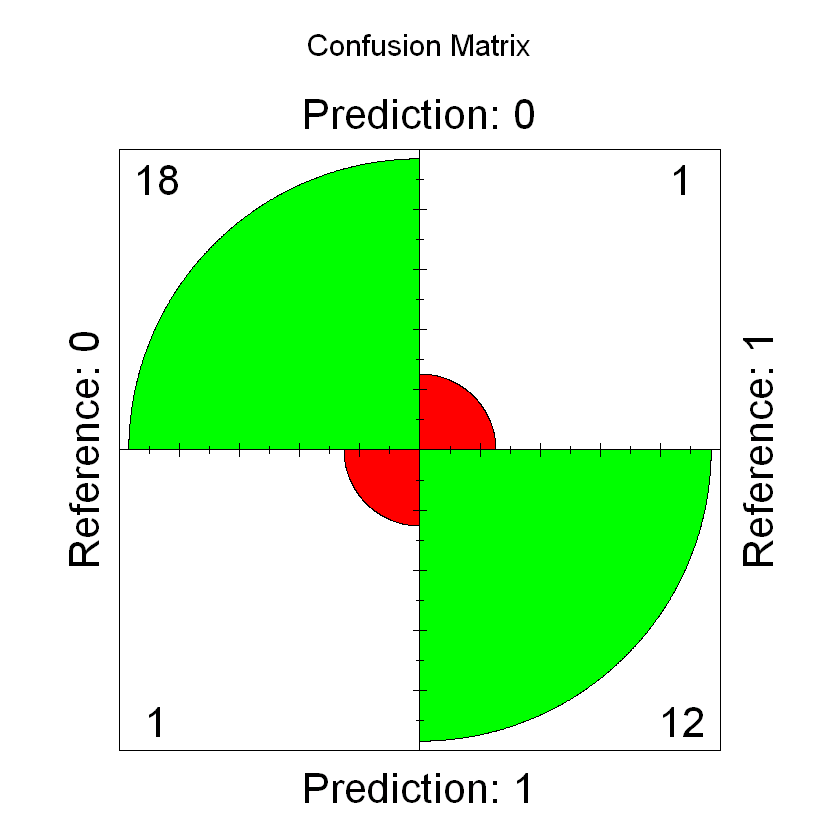

In [7]:
# Plot confusion matrix
fourfoldplot(conf_matrix$table, color=c("red","green"),
conf.level=0,main="Confusion Matrix"  
)

# ---- Extract Specific Metrics ----

# Accuracy
accuracy <- conf_matrix$overall['Accuracy']

# Kappa statistic
kappa <- conf_matrix$overall['Kappa']

# Sensitivity (Recall / TPR)
sensitivity <- conf_matrix$byClass['Sensitivity']

# Specificity (TNR)
specificity <- conf_matrix$byClass['Specificity']

# Precision (Positive Predictive Value)
precision <- conf_matrix$byClass['Pos Pred Value']

# Negative Predictive Value
npv <- conf_matrix$byClass['Neg Pred Value']

# F1 Score
f1 <- conf_matrix$byClass['F1']

# Print results
metrics <- data.frame(
  Accuracy = accuracy,
  Kappa = kappa,
  Precision = precision,
  Recall = sensitivity,
  Specificity = specificity,
  NPV = npv,
  F1_Score = f1
)

print(metrics)

### SVM (Support Vector Machine)

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks.

* It works by finding the best hyperplane that separates data points of different classes in a feature space.

* The support vectors are the closest data points to the hyperplane, which influence its position.

* SVM tries to maximize the margin (the distance between the hyperplane and the nearest support vectors) to improve generalization.

![ChatGPT Image Sep 4, 2025, 08_58_01 AM.png](<attachment:ChatGPT Image Sep 4, 2025, 08_58_01 AM.png>)
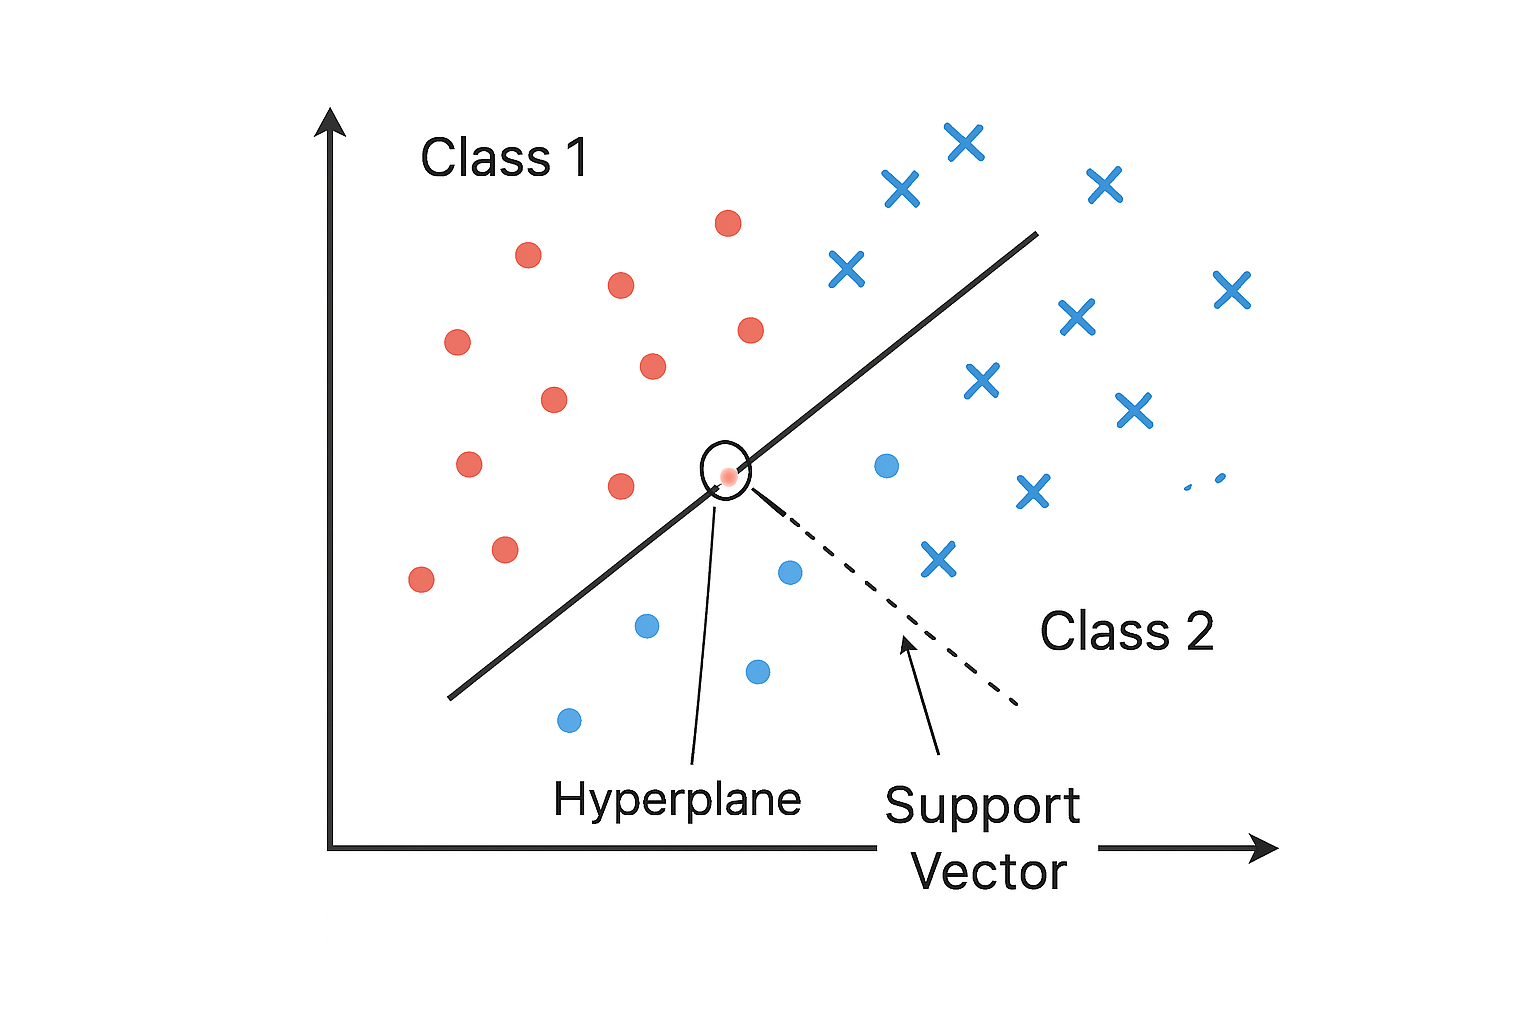

In [8]:
# Install if needed
# install.packages("caret")
install.packages("e1071")   # caret uses this for SVM
install.packages("kernlab") # dependency

library(caret)
library(e1071)
library(kernlab)

# Example dataset
data(iris)

# Train/test split
set.seed(123)
trainIndex <- createDataPartition(iris$Species, p = 0.8, list = FALSE)
trainData <- iris[trainIndex, ]
testData  <- iris[-trainIndex, ]

# Train SVM model
svm_model <- train(
  Species ~ ., 
  data = trainData, 
  method = "svmLinear",   # Linear SVM
  trControl = trainControl(method = "cv", number = 5)
)

# Print results
print(svm_model)

# Make predictions
predictions <- predict(svm_model, testData)
conf_matrix<-confusionMatrix(predictions, testData$Species)
print(conf_matrix)


Warning message:
"package 'e1071' is in use and will not be installed"
Warning message:
"package 'kernlab' is in use and will not be installed"


Support Vector Machines with Linear Kernel 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 96, 96, 96, 96, 96 
Resampling results:

  Accuracy   Kappa 
  0.9916667  0.9875

Tuning parameter 'C' was held constant at a value of 1
Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         1
  virginica       0          0         9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

           

Warning message:
"package 'pheatmap' is in use and will not be installed"


                              Class Precision Recall F1_Score
Class: setosa         Class: setosa     1.000    1.0    1.000
Class: versicolor Class: versicolor     0.909    1.0    0.952
Class: virginica   Class: virginica     1.000    0.9    0.947
[1] "Overall Accuracy: 0.967"


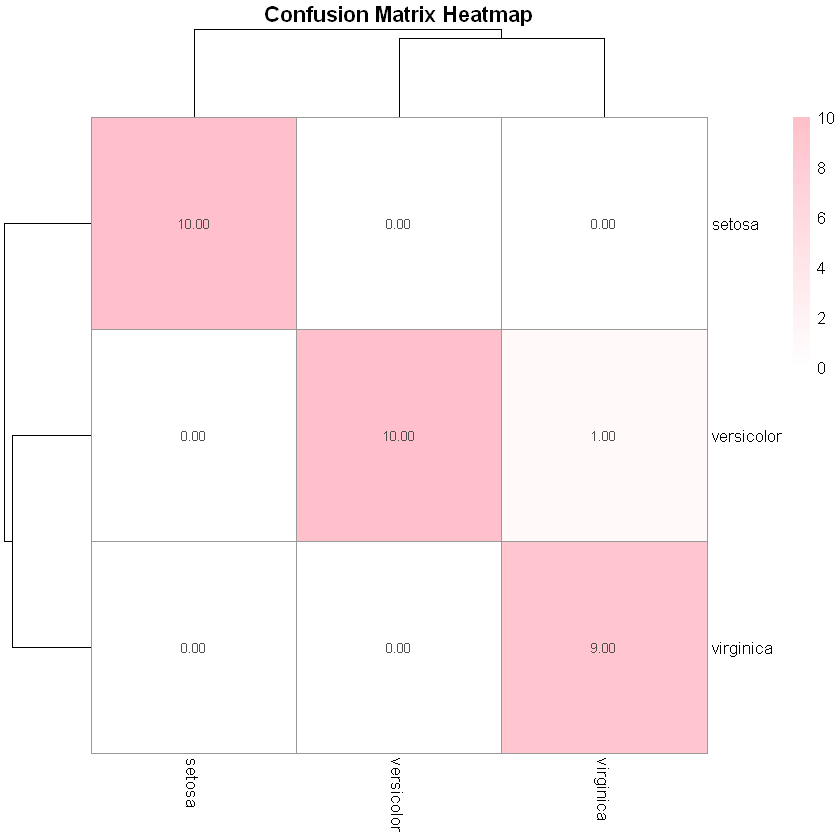

In [ ]:
install.packages("pheatmap")
library(pheatmap)

# ----------------------------
# Heatmap with pheatmap
# ----------------------------
cm <- conf_matrix$table

pheatmap(cm,
         display_numbers = TRUE,                # show counts
         color = colorRampPalette(c("white","pink"))(100),
         main = "Confusion Matrix Heatmap")

# ----------------------------
#  Extract key metrics
# ----------------------------
# Overall accuracy
accuracy <- conf_matrix$overall['Accuracy']

# Per-class Precision, Recall, F1
precision <- conf_matrix$byClass[,"Pos Pred Value"]
recall    <- conf_matrix$byClass[,"Sensitivity"]
f1        <- conf_matrix$byClass[,"F1"]

# Combine into a table
metrics <- data.frame(
  Class = rownames(conf_matrix$byClass),
  Precision = round(precision,3),
  Recall = round(recall,3),
  F1_Score = round(f1,3)
)

print(metrics)

# Show overall accuracy
print(paste("Overall Accuracy:", round(accuracy,3)))

## Summary

| Feature               | **Logistic Regression**                                  | **Linear SVM**                                            |
| --------------------- | -------------------------------------------------------- | --------------------------------------------------------- |
| **Goal**              | Estimates probability of class membership.               | Finds maximum-margin hyperplane separating classes.       |
| **Output**            | Probabilities (0–1) and class labels.                    | Only class labels (no direct probabilities).              |
| **Decision Boundary** | Linear (based on logistic function).                     | Linear hyperplane with maximum margin.                    |
| **Interpretability**  | Highly interpretable (coefficients show feature impact). | Less interpretable; focuses on support vectors.           |
| **Handling Outliers** | Sensitive to outliers.                                   | More robust due to margin maximization.                   |
| **Best Use Case**     | When probabilities are needed, simple linear problems.   | When classification accuracy is priority in linear space. |
